# new One - Final started 1/12/2022


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import plotly.express as px
from final_function import *
import seaborn as sns
import scienceplots
from matplotlib import pyplot as plt
import matplotlib.pylab as plt

plt.style.use(['science','no-latex',"nature"])
#plt.style.use('science')


In [2]:
###variables
continuous_values = [
    "Age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak"
]

cv = KFold(n_splits=10)

NA_REPLACE=["?"]

# Testing

In [3]:
synth_data=pd.read_csv("synth_pop_2.csv",index_col=0,dtype=float).reset_index(drop=True)
real_data=pd.read_csv("real_data_testing.csv",index_col=0,dtype=float).reset_index(drop=True)

In [4]:
categorical_values = real_data[real_data.columns.difference(continuous_values)].columns

In [5]:
categorical_values

Index(['ca', 'cp', 'exang', 'fbs', 'num', 'restecg', 'sex', 'slope', 'thal'], dtype='object')

## Trials

In [6]:
plot_data=trial_permutatin(real_data,categorical_values,continuous_values,cv,reps=20)

run nr 0 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
reps 1
{'Age': 0.8734885703761576, 'sex': 1.283975064173084, 'cp': 1.6776677667766775, 'trestbps': 1.0377291826657298, 'chol': 0.6703535634876765, 'fbs': 1.283975064173084, 'restecg': 1.7238036303630362, 'thalach': 0.8337333919384847, 'exang': 1.3895999356033164, 'oldpeak': 1.3515828425056495, 'slope': 1.3895999356033164, 'ca': 1.7238036303630362, 'thal': 1.7238036303630362, 'num': 1.9413012729844412}
{'Age': 0.8734885703761576, 'sex': 1.283975064173084, 'cp': 1.6776677667766775, 'trestbps': 1.0377291826657298, 'chol': 0.6703535634876765, 'fbs': 1.283975064173084, 'restecg': 1.7238036303630362, 'thalach': 0.8337333919384847, 'exang': 1.3895999356033164, 'oldpeak': 1.3515828425056495, 'slope': 1.3895999356033164, 'ca': 1.7238036303630362, 'thal': 1.7238036303630362, 'num': 1.9413012729844412}
reps 2
{'Age': 0.8734885703761576, 'sex': 1.283975064173084, 'cp': 1.6776677667766775, 'trestbps': 1.037729

In [7]:
df=plot_plotly(plot_data,cols=['cross','ndgc_score',
  'cohen_kappa_score',
  'r2_score',
  'levenshtein_normalized_similarity',
  'kendalltau',
  'weightedtau',
  'rbo',
  'damerau_levenshtein_normalized_similarity',
  'jaro_winkler_normalized_similarity',
  'hamming_normalized_similarity'])

In [8]:
def test_two_datasets(
    data, data_1, categorical_values, continuous_values, reps=10, seed=42
):

    result_1 = get_several_feat_imp_dataset_2(
        data, categorical_values, continuous_values, reps, seed=seed
    )
    result_2 = get_several_feat_imp_dataset_2(
        data_1, categorical_values, continuous_values, reps, seed=seed
    )
    sc = create_scores_v2(result_1, result_2)

    sc["cross"] = aggregate_data_cross(
        data, data_1, categorical_values, continuous_values, cv
    )

    return sc


In [9]:
for c in categorical_values:
    if len(real_data[c].unique())!=len(synth_data[c].unique()):
        print(c)

In [10]:
result=test_two_datasets(real_data, synth_data, categorical_values, continuous_values, reps=10, seed=42)

ValueError: Found unknown categories ['4.0'] in column 1 during transform

In [ ]:
bardata=pd.DataFrame(result["aggregated"],index=[0])


In [ ]:
bardata["cross"]=result["cross"]

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



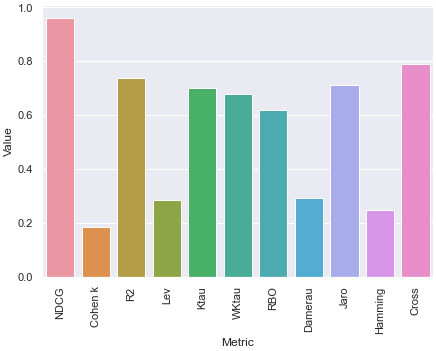

In [ ]:
bardata.columns=["NDCG","Cohen k","R2","Lev","Ktau","WKtau","RBO","Damerau","Jaro","Hamming","Cross"]

g=sns.barplot( data=bardata)
#sns_plot.set(xlabel='Nr of columns mutated', ylabel='Value')
plt.xlabel("Metric")
plt.ylabel("Value")
plt.xticks(rotation=90)
#ax.tick_params(axis='x', rotation=90)

fig = g.get_figure()
fig.savefig("Viz/synthetic.png")

In [ ]:
tt=pd.DataFrame({})
xx=pd.DataFrame(plot_data)
xx.drop("debug",axis=0,inplace=True)
for i in range(0,6):

    tt["col "+str(i)]=xx["run "+str(i)]-xx["run "+str(i+1)]

In [ ]:
viz_data=tt.T
#viz_data.drop(columns=["hamming_normalized_similarity","levenshtein_normalized_similarity"],inplace=True)
viz_data.columns=["Cross","NDCG","Cohen k","R2","lev","Ktau","WKtau","RBO","Damerau","Jaro","Hamming"]
s = viz_data.style
s.highlight_max(color="yellow",axis=1).highlight_min(color="orange",axis=1)
s.format(precision=2,na_rep="0")

tex=s.to_latex(column_format="l|r|r|r|r|r|r|r|r|r",multirow_align="t",position="h",hrules=True,convert_css=True,position_float="centering",label="tab:hyp", caption="Hypothesis testing of Distributed versus Centralised and local for every test.",)



In [ ]:
f = open("Viz/data_diff.tex", "w")
f.write(tex)
f.close()

In [ ]:
xx=pd.DataFrame(plot_data)
xx.drop("debug",axis=0,inplace=True)

In [ ]:
viz_data2=xx.copy()
#viz_data2.drop(index=["hamming_normalized_similarity","levenshtein_normalized_similarity"],inplace=True)
viz_data2.index=["Cross","NDCG","Cohen k","R2","lev","Ktau","WKtau","RBO","Damerau","Jaro","Hamming"]
viz_data2.columns=[str(i)  for i in range(0,7)]
s = viz_data2.style
s.format(precision=2,na_rep="0")

tex=s.to_latex(column_format="l|r|r|r|r|r|r|r|",multirow_align="t",position="h",hrules=True,convert_css=True,position_float="centering",label="tab:data", caption="Metric value after x columns permutated.",)



In [ ]:
f = open("Viz/data.tex", "w")
f.write(tex)
f.close()

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



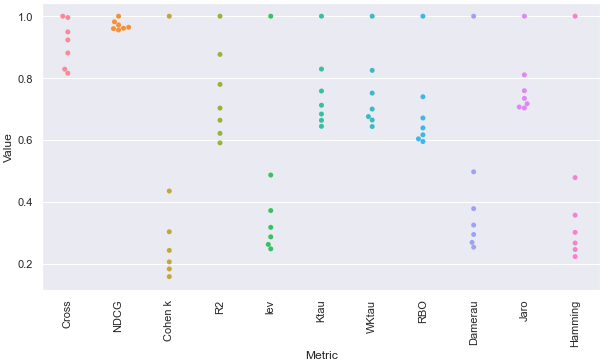

In [ ]:
sns.set(rc={'figure.figsize':(10,5.27)})
g=sns.swarmplot(data=viz_data2.T)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(xlabel='Metric', ylabel='Value')
fig = g.get_figure()
fig.savefig("Viz/swarm.png")

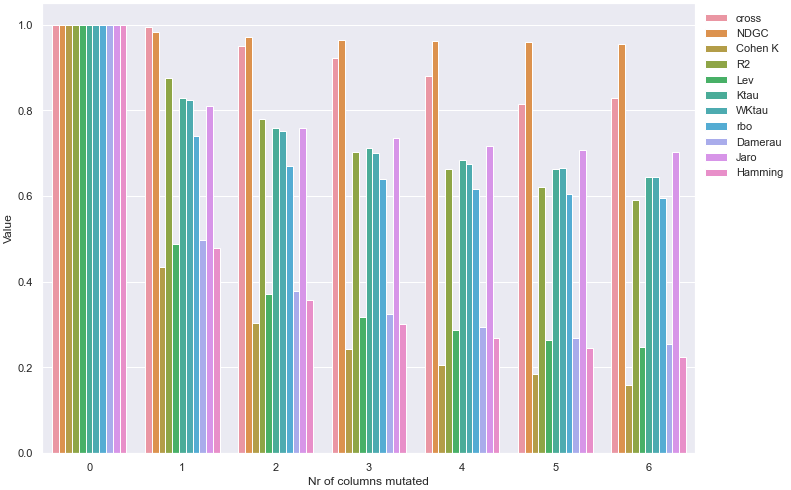

In [ ]:
dfplot=df.copy()
sns.set(rc={'figure.figsize':(11.7,8.27)})
dfplot.replace( "run ","",regex=True,inplace=True)
dfplot.columns=["Metric","Nr of columns mutated","Value"]
dfplot.replace({"ndgc_score":"NDCG","r2_score":"R2","cohen_kappa_score":"Cohen K","kendalltau":"Ktau","levenshtein_normalized_similarity":"Lev","jaro_winkler_normalized_similarity":"Jaro","weightedtau":"WKtau","damerau_levenshtein_normalized_similarity":"Damerau","hamming_normalized_similarity":"Hamming"},inplace=True)
sns_plot=sns.barplot(data=dfplot,hue="Metric",x="Nr of columns mutated",y="Value")
#sns_plot.set(xlabel='Nr of columns mutated', ylabel='Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig = sns_plot.get_figure()
fig.savefig("Viz/bars.png")

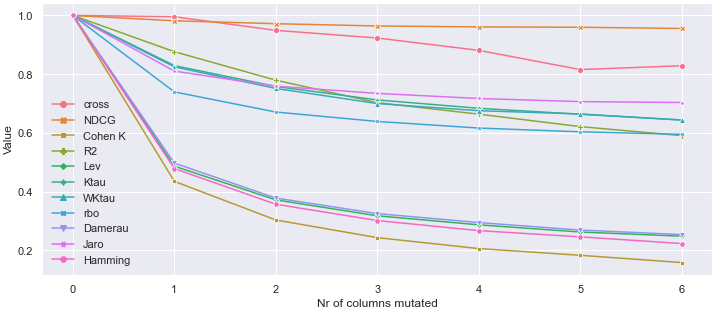

In [ ]:
dfplot=df.copy()
sns.set(rc={'figure.figsize':(12,5)})
dfplot.replace( "run ","",regex=True,inplace=True)
dfplot.columns=["Metric","Nr of columns mutated","Value"]
dfplot.replace({"ndgc_score":"NDCG","r2_score":"R2","cohen_kappa_score":"Cohen K","kendalltau":"Ktau","levenshtein_normalized_similarity":"Lev","jaro_winkler_normalized_similarity":"Jaro","weightedtau":"WKtau","damerau_levenshtein_normalized_similarity":"Damerau","hamming_normalized_similarity":"Hamming"},inplace=True)
sns_plot=sns.lineplot(data=dfplot,hue="Metric",x="Nr of columns mutated",y="Value",style="Metric",markers=True, dashes=False)

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='lower left')

fig = sns_plot.get_figure()
fig.savefig("Viz/lines.png")

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



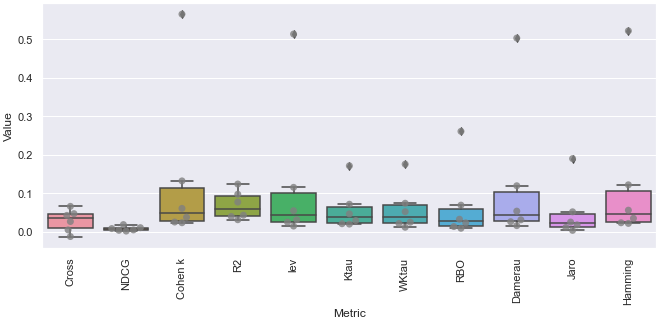

In [ ]:
sns.set(rc={'figure.figsize':(11,4.5)})
g=sns.boxplot(data=viz_data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.swarmplot(data=viz_data,
              color="gray",
              size = 7,
              alpha = 0.8)
g.set(xlabel='Metric', ylabel='Value')
fig = g.get_figure()
fig.savefig("Viz/boxplot.png")

In [ ]:
bigger_plot_data=[]

for i in range(5,40,5):
    print(i)
    bigger_plot_data.append(trial_permutatin(real_data,categorical_values,continuous_values,cv,reps=i))

5
run nr 0 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
reps 1
{'Age': 0.8734885703761576, 'sex': 1.283975064173084, 'cp': 1.6776677667766775, 'trestbps': 1.0377291826657298, 'chol': 0.6703535634876765, 'fbs': 1.283975064173084, 'restecg': 1.7238036303630362, 'thalach': 0.8337333919384847, 'exang': 1.3895999356033164, 'oldpeak': 1.3515828425056495, 'slope': 1.3895999356033164, 'ca': 1.7238036303630362, 'thal': 1.7238036303630362, 'num': 1.9413012729844412}
{'Age': 0.8734885703761576, 'sex': 1.283975064173084, 'cp': 1.6776677667766775, 'trestbps': 1.0377291826657298, 'chol': 0.6703535634876765, 'fbs': 1.283975064173084, 'restecg': 1.7238036303630362, 'thalach': 0.8337333919384847, 'exang': 1.3895999356033164, 'oldpeak': 1.3515828425056495, 'slope': 1.3895999356033164, 'ca': 1.7238036303630362, 'thal': 1.7238036303630362, 'num': 1.9413012729844412}
reps 2
{'Age': 0.8734885703761576, 'sex': 1.283975064173084, 'cp': 1.6776677667766775, 'trestbps': 1.0377

In [ ]:
variances=[]
for b in bigger_plot_data:
    d={}
    for runs,vals in b.items():
        d[runs]={}
        for metric,values in vals["debug"].items():
#            print(metric,values)
            d[runs][metric]={}

            d[runs][metric]=np.var(values)
    variances.append(d)


In [ ]:
vars_df=pd.DataFrame()
for idx,i in enumerate(variances):
    i_df=pd.DataFrame(i)
    i_df.reset_index(inplace=True)
    i_df["nrs"]=idx
    vars_df=vars_df.append(i_df,ignore_index=True)

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66204/3493010708.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66204/3493010708.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66204/3493010708.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66204/3493010708.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/8g/rym67m5d29dcjm2td47sgb_m0000gn/T/ipykernel_66204/3493010708.py:6: FutureWarning:

The frame.append method is depreca

In [ ]:
vars_df

,index,run 0,run 1,run 2,run 3,run 4,run 5,run 6,nrs
0,cross,0.0,0.013799,0.056979,0.047848,0.021446,0.054939,0.016315,0
1,ndgc_score,0.0,0.000026,0.000026,0.000013,0.000061,0.000056,0.000019,0
2,cohen_kappa_score,0.0,0.002205,0.002089,0.005258,0.003090,0.002679,0.002103,0
3,r2_score,0.0,0.009320,0.006984,0.006468,0.007426,0.006436,0.007960,0
4,levenshtein_normalized_similarity,0.0,0.001546,0.001896,0.003985,0.002198,0.003268,0.002169,0
...,...,...,...,...,...,...,...,...,...
72,weightedtau,0.0,0.001022,0.000768,0.000814,0.001060,0.001877,0.002236,6
73,rbo,0.0,0.002545,0.002098,0.001538,0.000948,0.000972,0.001053,6
74,damerau_levenshtein_normalized_similarity,0.0,0.006335,0.003493,0.002446,0.002208,0.001756,0.001319,6
75,jaro_winkler_normalized_similarity,0.0,0.001473,0.001051,0.000811,0.000703,0.000511,0.000748,6


In [ ]:
hhhj=pd.melt(vars_df,id_vars=["nrs","index"],value_vars=["run 0","run 1","run 2","run 3","run 4","run 5","run 6"])

In [ ]:
hhhj.replace( "run ","",regex=True,inplace=True)
hhhj["nrs"]=hhhj["nrs"]*5+5

In [ ]:
hhhj.columns=["Nr of repetitions","Metric","Nr of columns mutated","Value"]

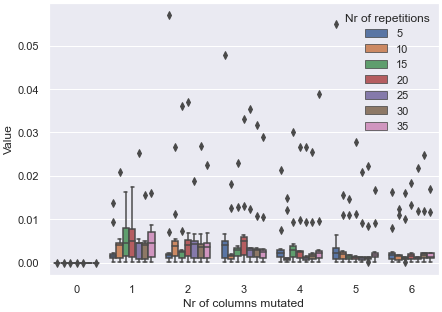

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})

g=sns.boxplot(data=hhhj,x="Nr of columns mutated",y="Value",hue="Nr of repetitions")
g.set(xlabel='Nr of columns mutated', ylabel='Value')
fig = g.get_figure()
fig.savefig("Viz/variance.png")

In [ ]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items 

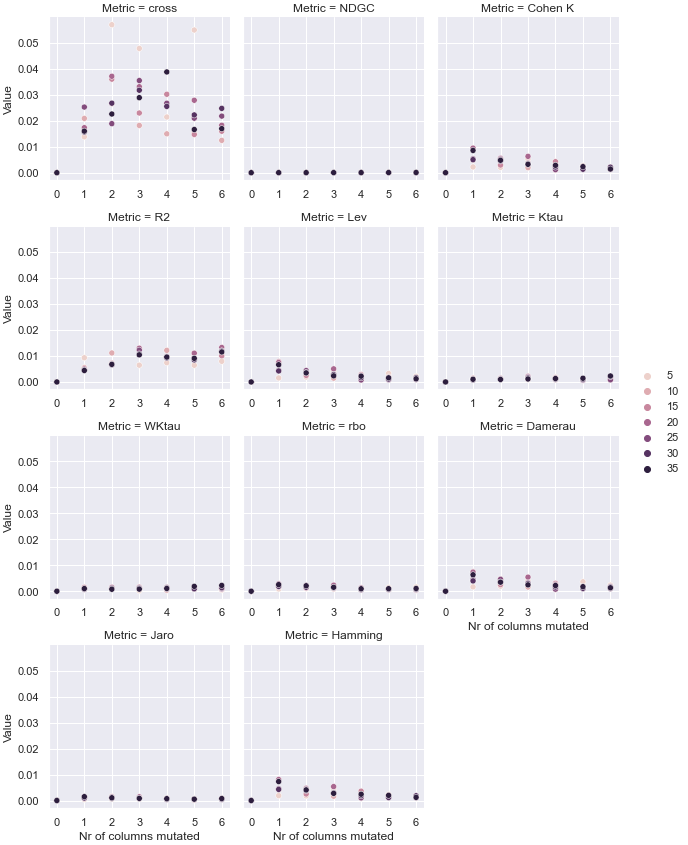

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
hhhj.replace({"ndgc_score":"NDCG","r2_score":"R2","cohen_kappa_score":"Cohen K","kendalltau":"Ktau","levenshtein_normalized_similarity":"Lev","jaro_winkler_normalized_similarity":"Jaro","weightedtau":"WKtau","damerau_levenshtein_normalized_similarity":"Damerau","hamming_normalized_similarity":"Hamming"},inplace=True)

g = sns.FacetGrid(hhhj, col="Metric",col_wrap=3,sharey=True,sharex=False,legend_out=True)
g.map(sns.scatterplot, "Nr of columns mutated", "Value","Nr of repetitions")
g.add_legend()
g.tight_layout()
g.savefig("Viz/facet_plot.png")


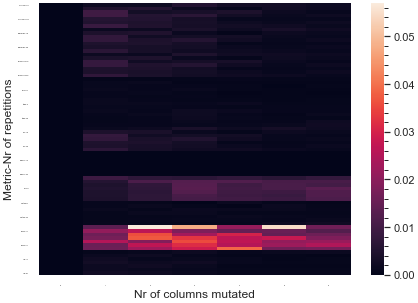

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab([hhhj["Metric"],hhhj["Nr of repetitions"]],hhhj["Nr of columns mutated"],values=hhhj["Value"],aggfunc="mean"),ax=ax)
ax.tick_params(labelsize=2)
#nao tem bons yticks